In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wutils.general import load_pickle

In [2]:
df = pd.read_csv('news/wandb_export_2020-12-07T19 18 36.351-08 00.csv')

In [3]:
df['embedding_type'][df.embedding_type.isna()] = 'fasttext'

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
df[df.embedding_type.isna()]

,Name,Runtime,Notes,State,Tags,num_cord,randomized_good,model_type,embedding_type,dataset,n_estimators,resume,accuracy,f1


In [5]:
# df = df[df.f1 > 0]
df = df[df.State == 'finished']
ndf = df[(df.dataset == 'news') | (df['dataset'].isna()) & (df.f1 > 0)]

In [6]:
res_df = ndf.groupby(['embedding_type', 'model_type', 'num_cord']).agg({ 'accuracy': (np.mean, np.std), 'f1': (np.mean, np.std) })

In [7]:
def to_latex(gdf, idx):
    res = gdf.loc[idx]
    measures = [round(x, 3) for x in (
        res.loc[('accuracy', 'mean')],
        res.loc[('accuracy', 'std')],
        res.loc[('f1', 'mean')],
        res.loc[('f1', 'std')]
    )]
    out = ('${} \pm {}$ & ${} \pm {}$'.format(*measures))
    print(out)
    return out

In [8]:
res = res_df.loc[('bert', 'random_forest', 0)]

In [9]:
news_res = [
    to_latex(res_df, ('bert', 'random_forest', 10000)),
    to_latex(res_df, ('bert', 'random_forest', 0)),
    to_latex(res_df, ('bert', 'logistic_regression', 10000)),
    to_latex(res_df, ('bert', 'logistic_regression', 0)),
    to_latex(res_df, ('fasttext', 'random_forest', 10000)),
    to_latex(res_df, ('fasttext', 'random_forest', 0)),
    to_latex(res_df, ('fasttext', 'logistic_regression', 10000)),
    to_latex(res_df, ('fasttext', 'logistic_regression', 0))
]

$0.729 \pm 0.003$ & $0.786 \pm 0.002$
$0.757 \pm 0.004$ & $0.809 \pm 0.004$
$0.742 \pm 0.003$ & $0.714 \pm 0.054$
$0.791 \pm 0.004$ & $0.802 \pm 0.036$
$0.716 \pm 0.005$ & $0.664 \pm 0.089$
$0.788 \pm 0.003$ & $0.799 \pm 0.048$
$0.773 \pm 0.004$ & $0.795 \pm 0.039$
$0.754 \pm 0.004$ & $0.731 \pm 0.057$


In [10]:
cdf = df[(df.dataset == 'claims_fixed')]
res_cdf = cdf.groupby(['embedding_type', 'model_type', 'num_cord']).agg({ 'accuracy': (np.mean, np.std), 'f1': (np.mean, np.std) })

In [11]:
claims_res = [
    to_latex(res_cdf, ('bert', 'random_forest', 10000)),
    to_latex(res_cdf, ('bert', 'random_forest', 0)),
    to_latex(res_cdf, ('bert', 'logistic_regression', 10000)),
    to_latex(res_cdf, ('bert', 'logistic_regression', 0)),
    to_latex(res_cdf, ('fasttext', 'random_forest', 10000)),
    to_latex(res_cdf, ('fasttext', 'random_forest', 0)),
    to_latex(res_cdf, ('fasttext', 'logistic_regression', 10000)),
    to_latex(res_cdf, ('fasttext', 'logistic_regression', 0))
]

$0.921 \pm 0.02$ & $0.524 \pm 0.479$
$0.926 \pm 0.015$ & $0.03 \pm 0.074$
$0.913 \pm 0.005$ & $0.5 \pm 0.498$
$0.904 \pm 0.026$ & $0.211 \pm 0.064$
$0.912 \pm 0.014$ & $0.499 \pm 0.5$
$0.922 \pm 0.012$ & $0.051 \pm 0.079$
$0.907 \pm 0.016$ & $0.474 \pm 0.52$
$0.901 \pm 0.02$ & $0.0 \pm 0.0$


In [12]:
mdf = df[(df.dataset == 'mm-covid-fixed')]
res_mdf = mdf.groupby(['embedding_type', 'model_type', 'num_cord']).agg({ 'accuracy': (np.mean, np.std), 'f1': (np.mean, np.std) })

In [13]:
mm_res = [
    to_latex(res_mdf, ('bert', 'random_forest', 10000)),
    to_latex(res_mdf, ('bert', 'random_forest', 0)),
    to_latex(res_mdf, ('bert', 'logistic_regression', 10000)),
    to_latex(res_mdf, ('bert', 'logistic_regression', 0)),
    to_latex(res_mdf, ('fasttext', 'random_forest', 10000)),
    to_latex(res_mdf, ('fasttext', 'random_forest', 0)),
    to_latex(res_mdf, ('fasttext', 'logistic_regression', 10000)),
    to_latex(res_mdf, ('fasttext', 'logistic_regression', 0))
]

$0.89 \pm 0.011$ & $0.778 \pm 0.018$
$0.922 \pm 0.005$ & $0.948 \pm 0.003$
$0.918 \pm 0.008$ & $0.846 \pm 0.017$
$0.943 \pm 0.002$ & $0.962 \pm 0.001$
$0.853 \pm 0.008$ & $0.681 \pm 0.021$
$0.901 \pm 0.004$ & $0.935 \pm 0.003$
$0.899 \pm 0.01$ & $0.806 \pm 0.019$
$0.864 \pm 0.003$ & $0.912 \pm 0.004$


In [14]:
res_df = ndf.groupby(['embedding_type', 'model_type', 'num_cord']).agg({ 'accuracy': (np.mean, np.std), 'f1': (np.mean, np.std) })

In [15]:
print(' \\\\\n'.join([' & '.join(x) for x in zip(news_res, claims_res, mm_res)]))

$0.729 \pm 0.003$ & $0.786 \pm 0.002$ & $0.921 \pm 0.02$ & $0.524 \pm 0.479$ & $0.89 \pm 0.011$ & $0.778 \pm 0.018$ \\
$0.757 \pm 0.004$ & $0.809 \pm 0.004$ & $0.926 \pm 0.015$ & $0.03 \pm 0.074$ & $0.922 \pm 0.005$ & $0.948 \pm 0.003$ \\
$0.742 \pm 0.003$ & $0.714 \pm 0.054$ & $0.913 \pm 0.005$ & $0.5 \pm 0.498$ & $0.918 \pm 0.008$ & $0.846 \pm 0.017$ \\
$0.791 \pm 0.004$ & $0.802 \pm 0.036$ & $0.904 \pm 0.026$ & $0.211 \pm 0.064$ & $0.943 \pm 0.002$ & $0.962 \pm 0.001$ \\
$0.716 \pm 0.005$ & $0.664 \pm 0.089$ & $0.912 \pm 0.014$ & $0.499 \pm 0.5$ & $0.853 \pm 0.008$ & $0.681 \pm 0.021$ \\
$0.788 \pm 0.003$ & $0.799 \pm 0.048$ & $0.922 \pm 0.012$ & $0.051 \pm 0.079$ & $0.901 \pm 0.004$ & $0.935 \pm 0.003$ \\
$0.773 \pm 0.004$ & $0.795 \pm 0.039$ & $0.907 \pm 0.016$ & $0.474 \pm 0.52$ & $0.899 \pm 0.01$ & $0.806 \pm 0.019$ \\
$0.754 \pm 0.004$ & $0.731 \pm 0.057$ & $0.901 \pm 0.02$ & $0.0 \pm 0.0$ & $0.864 \pm 0.003$ & $0.912 \pm 0.004$


In [16]:
res.loc[('accuracy', 'mean')]

0.7573490300375468

In [17]:
vaccine = [
    to_latex(vaccine_res, ('bert', 'random_forest', 10000)),
    to_latex(vaccine_res, ('bert', 'random_forest', 0)),
    to_latex(vaccine_res, ('bert', 'logistic_regression', 10000)),
    to_latex(vaccine_res, ('bert', 'logistic_regression', 0)),
    to_latex(vaccine_res, ('fasttext', 'random_forest', 10000)),
    to_latex(vaccine_res, ('fasttext', 'random_forest', 0)),
    to_latex(vaccine_res, ('fasttext', 'logistic_regression', 10000)),
    to_latex(vaccine_res, ('fasttext', 'logistic_regression', 0))
]
transmission = [
    to_latex(t_res, ('bert', 'random_forest', 10000)),
    to_latex(t_res, ('bert', 'random_forest', 0)),
    to_latex(t_res, ('bert', 'logistic_regression', 10000)),
    to_latex(t_res, ('bert', 'logistic_regression', 0)),
    to_latex(t_res, ('fasttext', 'random_forest', 10000)),
    to_latex(t_res, ('fasttext', 'random_forest', 0)),
    to_latex(t_res, ('fasttext', 'logistic_regression', 10000)),
    to_latex(t_res, ('fasttext', 'logistic_regression', 0))
]
cleaned = [
    to_latex(cn_res, ('bert', 'random_forest', 10000)),
    to_latex(cn_res, ('bert', 'random_forest', 0)),
    to_latex(cn_res, ('bert', 'logistic_regression', 10000)),
    to_latex(cn_res, ('bert', 'logistic_regression', 0)),
    to_latex(cn_res, ('fasttext', 'random_forest', 10000)),
    to_latex(cn_res, ('fasttext', 'random_forest', 0)),
    to_latex(cn_res, ('fasttext', 'logistic_regression', 10000)),
    to_latex(cn_res, ('fasttext', 'logistic_regression', 0))
]

NameError: name 'vaccine_res' is not defined

In [ ]:
print(' \\\\\n'.join([' & '.join(x) for x in zip(cleaned, vaccine, transmission)]))

In [ ]:
vaccine_df = df[(df.dataset == 'news_vaccine')]
vaccine_res = vaccine_df.groupby(['embedding_type', 'model_type', 'num_cord']).agg({ 'accuracy': (np.mean, np.std), 'f1': (np.mean, np.std) })
t_df = df[(df.dataset == 'news_transmission')]
t_res = t_df.groupby(['embedding_type', 'model_type', 'num_cord']).agg({ 'accuracy': (np.mean, np.std), 'f1': (np.mean, np.std) })
cn_df = df[(df.dataset == 'news_clean')]
cn_res = cn_df.groupby(['embedding_type', 'model_type', 'num_cord']).agg({ 'accuracy': (np.mean, np.std), 'f1': (np.mean, np.std) })

In [ ]:
sns.set_context("paper")

In [ ]:
import matplotlib
matplotlib.rcParams.update({
    'figure.autolayout': True
})

In [ ]:
for name, group in test:
    print(name)
    print(group.num_cord.value_counts())

In [40]:
import matplotlib
sns.set_context('poster')
# matplotlib.use("pgf")
matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
# #     'text.usetex': True,
#     'pgf.rcfonts': False,
    'figure.autolayout': False
})

In [ ]:
# import matplotlib
# sns.set_context('talk')
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
#     'figure.autolayout': True
# })

('bert', 'logistic_regression')
('bert', 'random_forest')
('fasttext', 'logistic_regression')
('fasttext', 'random_forest')
('bert', 'logistic_regression')
('bert', 'random_forest')
('fasttext', 'logistic_regression')
('fasttext', 'random_forest')


<Figure size 1728x1008 with 0 Axes>

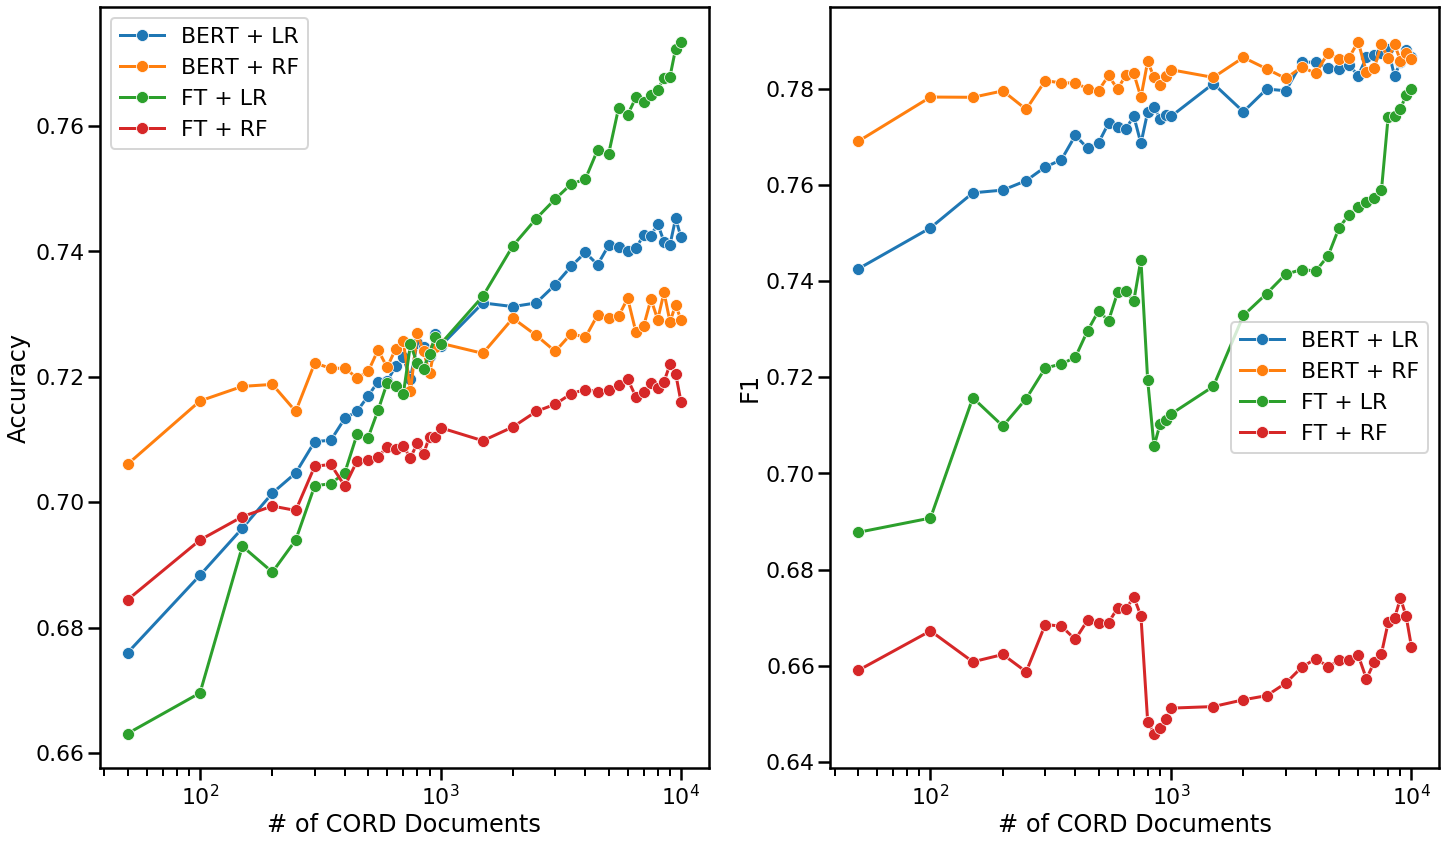

In [47]:
test = ndf[(ndf.num_cord > 10) & (ndf.num_cord % 500 != 1)].groupby(['embedding_type', 'model_type'])
plt.figure(figsize=(24, 14))
name_map = {
    ('bert', 'logistic_regression'): 'BERT + LR',
    ('bert', 'random_forest'): 'BERT + RF',
    ('fasttext', 'logistic_regression'): 'FT + LR',
    ('fasttext', 'random_forest'): 'FT + RF'
}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 14))
# fig.suptitle('Accuracy & F1 Score vs. # of CORD Articles')

figure = plt.gcf()
# figure.set_size_inches(2.4, 2.4)
for name, group in test:
    if 'kmeans_logistic_regression' in name:
        continue
    print(name)
    sns.lineplot(x="num_cord", y="accuracy", ax=ax1, data=group, label=name_map[name], marker='o', err_style='bars', ci=None)
for name, group in test:
    if 'kmeans_logistic_regression' in name:
        continue
    print(name)
    sns.lineplot(x="num_cord", y="f1", ax=ax2, data=group[group.randomized_good == True], label=name_map[name], marker='o', err_style='bars', ci=None)
ax1.set_xlabel('# of CORD Documents')
ax2.set_xlabel('# of CORD Documents')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('F1')
ax1.set_xscale('log')
ax2.set_xscale('log')
# plt.gca().set_ylim([0.6, 0.8])
# plt.legend()
# figure = plt.gcf()
# figure.set_size_inches(4.8041, 4.8)
# plt.savefig('acc_plot.pgf')
# figure.savefig("dual_plots.pdf")
figure.savefig("acc_plot.pdf", bbox_inches='tight')
# plt.xticks(rotation=30)

('bert', 'logistic_regression')
('bert', 'random_forest')
('fasttext', 'logistic_regression')
('fasttext', 'random_forest')


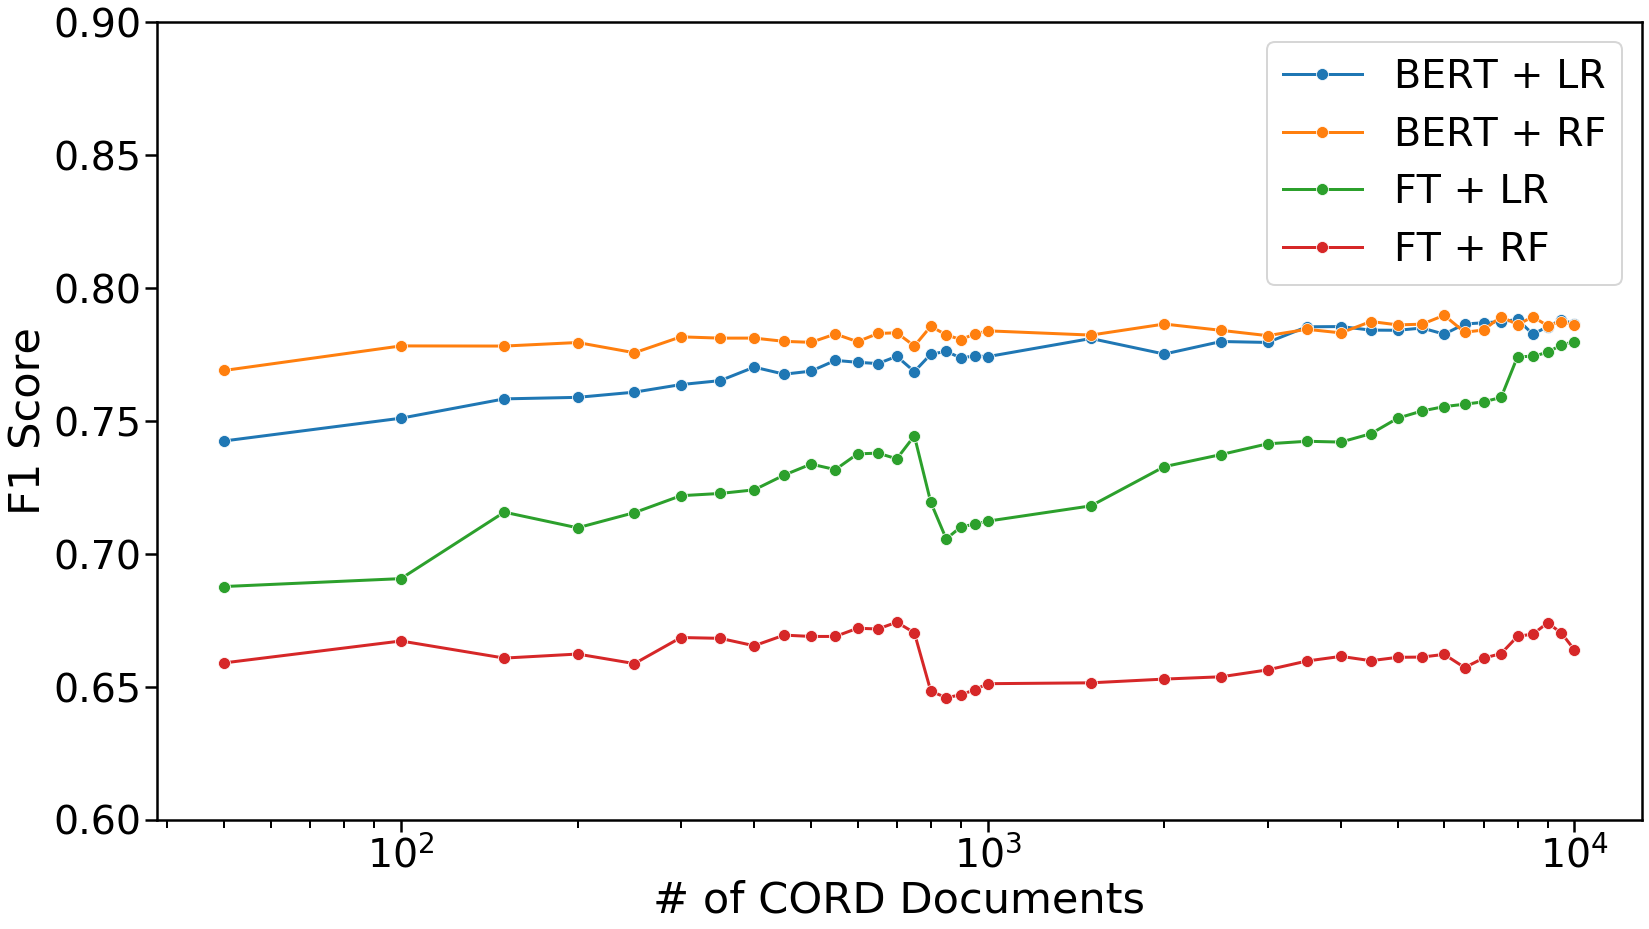

In [28]:
# Fig 2
plt.figure(figsize=(24, 14))
figure = plt.gcf()
# figure.set_size_inches(2.4, 2.4)
for name, group in test:
    if 'kmeans_logistic_regression' in name:
        continue
    print(name)
    sns.lineplot(x="num_cord", y="f1", data=group[group.randomized_good == True], label=name_map[name], marker='o', err_style='bars', ci=None)
plt.xlabel('# of CORD Documents')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.gca().set_ylim([0.6, 0.9])
plt.legend()
figure.savefig("f1_plot.pdf", bbox_inches='tight')
# plt.xticks(rotation=30)

In [ ]:
plt.figure(figsize=(24, 14))
sns.pointplot(x="num_cord", y="accuracy", data=df, label='accuracy', color='blue')
sns.pointplot(x="num_cord", y="f1", data=df, label='f1', color='red')
plt.legend()
plt.xticks(rotation=30)

In [ ]:
news_df = pd.read_csv('./news/wandb_export_2020-11-23T14 31 27.116-08 00.csv')

In [ ]:
bert_lr_df = news_df[(news_df['model_type'] == 'logistic_regression') & (news_df['embedding_type'] == 'bert') & (news_df['randomized_good'] == True)]

In [ ]:
plt.figure(figsize=(24, 14))
sns.pointplot(x="num_cord", y="accuracy", data=bert_lr_df, label='accuracy', color='blue')
sns.pointplot(x="num_cord", y="f1", data=bert_lr_df, label='f1', color='red')
plt.legend()
plt.xticks(rotation=30)

In [ ]:
bert_kmeans_lr_df = news_df[(news_df['model_type'] == 'kmeans_logistic_regression') & (news_df['embedding_type'] == 'bert') & (news_df['randomized_good'] == True)]

In [ ]:
plt.figure(figsize=(24, 14))
sns.pointplot(x="num_cord", y="accuracy", data=bert_kmeans_lr_df, label='accuracy', color='blue')
sns.pointplot(x="num_cord", y="f1", data=bert_kmeans_lr_df, label='f1', color='red')
plt.legend()
plt.xticks(rotation=30)

In [ ]:
ft_kmeans_lr_df = news_df[(news_df['model_type'] == 'kmeans_logistic_regression') & (news_df['embedding_type'] != 'bert')]

In [ ]:
plt.figure(figsize=(24, 14))
sns.pointplot(x="num_cord", y="accuracy", data=ft_kmeans_lr_df, label='accuracy', color='blue')
sns.pointplot(x="num_cord", y="f1", data=ft_kmeans_lr_df, label='f1', color='red')
plt.legend()
plt.xticks(rotation=30)

In [ ]:
ft_lr_df = news_df[(news_df['model_type'] == 'logistic_regression') & (news_df['embedding_type'] != 'bert')]

In [ ]:
plt.figure(figsize=(24, 14))
sns.pointplot(x="num_cord", y="accuracy", data=ft_lr_df, label='accuracy', color='blue')
sns.pointplot(x="num_cord", y="f1", data=ft_lr_df, label='f1', color='red')
plt.legend()
plt.xticks(rotation=30)